In [4]:
import pandas as pd

df = pd.read_excel('Co.xlsx')

In [5]:
X = df.drop(['Clothes'], axis=1)
Y = df['Clothes']

In [51]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print(object_cols)

['Event', 'Weather', 'Color', 'Clothes']


In [39]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables",len(object_cols))

Categorical variables 4


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

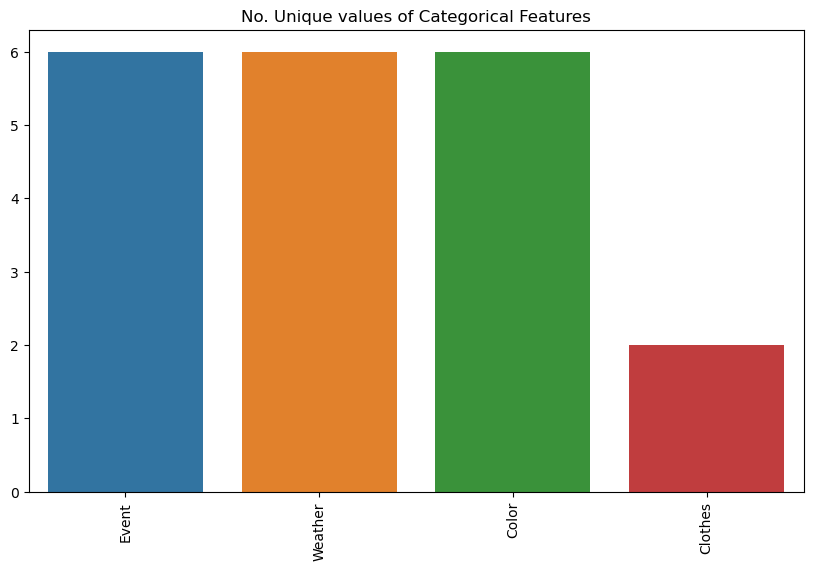

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

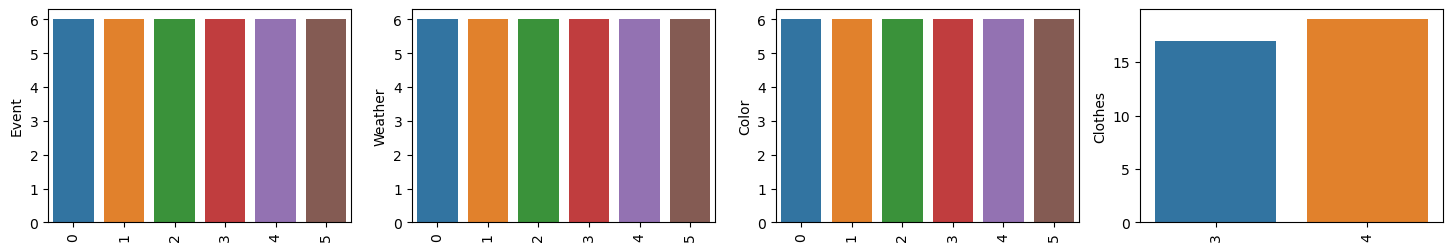

In [43]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1

for col in object_cols:
    y= df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [13]:
from sklearn.model_selection import train_test_split
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(
   X, Y, test_size = 0.8, random_state = 0)

In [22]:
df.Event[df.Event == 'Diwali'] = 0
df.Event[df.Event == 'Christmas'] = 1
df.Event[df.Event == 'Eid'] = 2
df.Event[df.Event == 'Holi'] = 3
df.Event[df.Event == 'Wedding'] = 4
df.Event[df.Event == 'Ganpati'] = 5
df.Weather[df.Weather == 'Rainy'] = 0
df.Weather[df.Weather == 'Cloudy'] = 1
df.Weather[df.Weather == 'Windy'] = 2
df.Weather[df.Weather == 'Sunny'] = 3
df.Weather[df.Weather == 'Snowfall'] = 4
df.Weather[df.Weather == 'Heavy rain'] = 5

In [23]:
df.Color [df.Color == 'Black'] = 0
df.Color [df.Color == 'Blue'] = 1
df.Color [df.Color == 'Yellow'] = 2
df.Color [df.Color == 'white'] = 3
df.Color [df.Color == 'Red'] = 4
df.Color [df.Color == 'Violet'] = 5

df.Clothes [df.Clothes == 'Sherwani-Saree'] = 3
df.Clothes [df.Clothes == 'Kurta-Salwar/Kameej'] = 4

In [24]:
df

,Event,Weather,Color,Clothes
0,0,0,0,3
1,0,1,1,4
2,0,2,2,3
3,0,3,3,4
4,0,4,4,3
5,0,5,5,4
6,1,0,1,4
7,1,1,2,4
8,1,2,0,3
9,1,3,4,4


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Event    36 non-null     object
 1   Weather  36 non-null     object
 2   Color    36 non-null     object
 3   Clothes  36 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [26]:
df["Clothes"].value_counts()

4    19
3    17
Name: Clothes, dtype: int64

In [28]:
df.describe()

,Event,Weather,Color,Clothes
count,36,36,36,36
unique,6,6,6,2
top,0,0,0,4
freq,6,6,6,19


In [29]:
df

,Event,Weather,Color,Clothes
0,0,0,0,3
1,0,1,1,4
2,0,2,2,3
3,0,3,3,4
4,0,4,4,3
5,0,5,5,4
6,1,0,1,4
7,1,1,2,4
8,1,2,0,3
9,1,3,4,4


In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['Clothes'], axis=1)
Y = df['Clothes']

from sklearn.model_selection import train_test_split
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
   X, Y, test_size = 0.8, random_state = 0)

In [33]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1642982519932541


In [35]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1296015843429636
